## Introduction

In [8]:
import os
import requests
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots  # optional, requires latex
plt.style.use(['science', 'grid'])
from phd.plot import book_config, get_current_config as plt_cfg
book_config.set_as_current()

results_folder = '../results/II_PINNs'  
if not os.path.exists(results_folder):
    os.makedirs(results_folder)

# --- Figure settings ---
save_fig = True
if save_fig:
    mpl.rcParams['pgf.texsystem'] = 'pdflatex'

In [ ]:
def fetch_count_for_year(year, query_terms, sleep_secs=1.0):
    """
    Query OpenAlex for number of works published in given year
    whose title matches any of the query_terms.
    """
    url = "https://api.openalex.org/works"
    total = 0
    for term in query_terms:
        # Filter by publication year and title search
        params = {
            "filter": f"publication_year:{year},title.search:{term}",
            "per_page": 1  # only need meta
        }
        resp = requests.get(url, params=params)
        resp.raise_for_status()
        data = resp.json()
        count = data.get("meta", {}).get("count", 0)
        total += count
        time.sleep(sleep_secs)
    return total


# Define orthographic variants of the phrase to tolerate small differences
query_terms = [
    "Physics-Informed Neural Networks",
    "Physics Informed Neural Networks",
    "Physics-Informed Neural Network",
    "Physics Informed Neural Network",
    "PINNs",
    "Physics–Informed Neural Networks"
]
years = list(range(2018, 2026))  # up to current year (2025)
counts = []
for y in years:
    try:
        c = fetch_count_for_year(y, query_terms)
        print(f"Year {y}: {c}")
    except Exception as e:
        print(f"Error for year {y}: {e}")
        c = None
    counts.append(c)

Year 2018: 30
Year 2019: 144
Year 2020: 577
Year 2021: 1457
Year 2022: 3104
Year 2023: 5526
Year 2024: 8733
Year 2025: 14479


Figure of width 0.63 x page width saved at ../results/II_PINNs/images/PINNs_publications_by_year.pgf/png


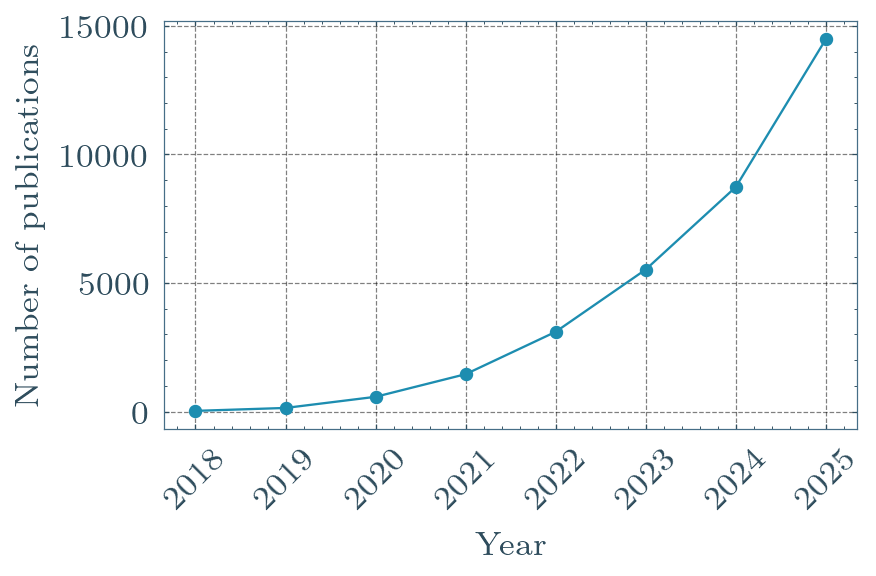

In [10]:
# Plot the results
fig = plt.figure(figsize=(3,2), dpi=300)
plt.plot(years, counts, marker='o')
# plt.title("Number of publications with 'Physics-Informed Neural Networks' in title (by year)")
plt.xlabel("Year", fontsize=8)
plt.ylabel("Number of publications", fontsize=8)
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tick_params(labelsize=8)
plt.tight_layout()

if save_fig:
    figure_folder = "./images"
    os.makedirs(figure_folder+'/pgf', exist_ok=True)
    fig.savefig(os.path.join(figure_folder, 'pgf', 'PINNs_publications_by_year.pgf'), bbox_inches='tight')
    fig.savefig(os.path.join(figure_folder, 'PINNs_publications_by_year.png'), dpi=300, bbox_inches='tight')
    print(f"Figure of width {fig.get_size_inches()[0]/plt_cfg().page_width:.2f} x page width saved at {os.path.join(images_folder, 'PINNs_publications_by_year.pgf/png')}")

## Activation Functions

Common activation functions used in neural networks for PINNs.

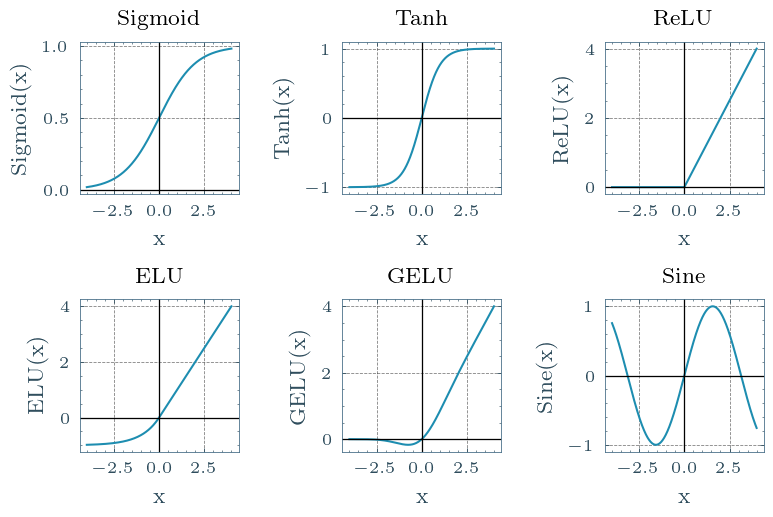

Figure of width 0.85 x page width saved at ./images/activation_functions.png/pgf


In [17]:

import numpy as np

# Define x range for plotting
x = np.linspace(-4, 4, 1000)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

def sine_activation(x):
    return np.sin(x)

# Plot all activation functions
fig_width = 4 # in inches
fig, axes = plt.subplots(2, 3, figsize=(fig_width, fig_width*2/3), dpi=200)
axes = axes.flatten()

activations = [
    ('Sigmoid', sigmoid(x)),
    ('Tanh', tanh(x)),
    ('ReLU', relu(x)),
    # ('Leaky ReLU', leaky_relu(x)),
    ('ELU', elu(x)),
    # ('Swish', swish(x)),
    ('GELU', gelu(x)),
    ('Sine', sine_activation(x)),
]

for idx, (name, y) in enumerate(activations):
    axes[idx].plot(x, y, linewidth=2.0*plt_cfg().scale)
    axes[idx].set_title(name)
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel(f'{name}(x)')
    axes[idx].grid(True)
    axes[idx].axhline(y=0, color='k', linewidth=1.25*plt_cfg().scale)
    axes[idx].axvline(x=0, color='k', linewidth=1.25*plt_cfg().scale)


plt.tight_layout()
plt.show()


# Save the figure
if save_fig:
    figures_folder = "./images"
    os.makedirs(os.path.join(figures_folder, 'pgf'), exist_ok=True)
    fig.savefig(os.path.join(figures_folder, 'activation_functions.png'), dpi=300, bbox_inches='tight')
    fig.savefig(os.path.join(figures_folder, 'pgf', 'activation_functions.pgf'), bbox_inches='tight')
    print(f"Figure of width {fig.get_size_inches()[0]/plt_cfg().page_width:.2f} x page width saved at {os.path.join(figures_folder, 'activation_functions.png/pgf')}")
